In [1]:
import chess
import random
import numpy as np

In [2]:
board = chess.Board()

None


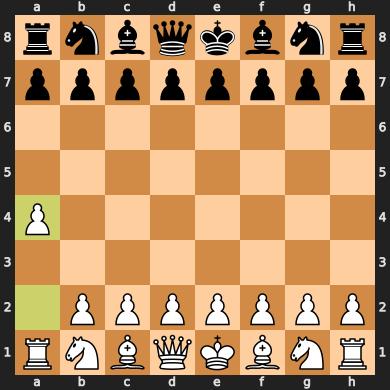

In [3]:
board.turn
move = random.choice(list(board.legal_moves))
board.push(move)
print(board.outcome())
board

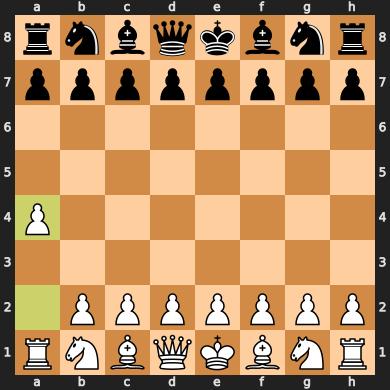

In [4]:
board

In [5]:
for move in board.legal_moves:
    print(move.uci())

g8h6
g8f6
b8c6
b8a6
h7h6
g7g6
f7f6
e7e6
d7d6
c7c6
b7b6
a7a6
h7h5
g7g5
f7f5
e7e5
d7d5
c7c5
b7b5
a7a5


In [6]:
board.push(chess.Move.from_uci('b7b2'))

In [7]:
board.push(chess.Move.from_uci('a8a7'))

In [8]:
board.pop()

Move.from_uci('a8a7')

In [9]:
board = chess.Board()

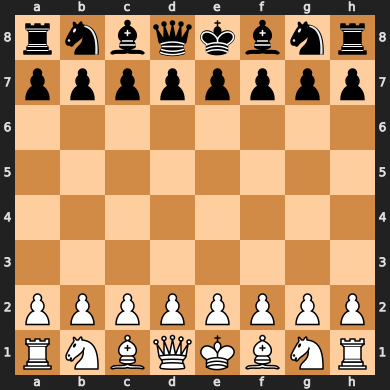

In [10]:
board

In [11]:
board.apply_mirror()
board.fen()

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR b KQkq - 0 1'

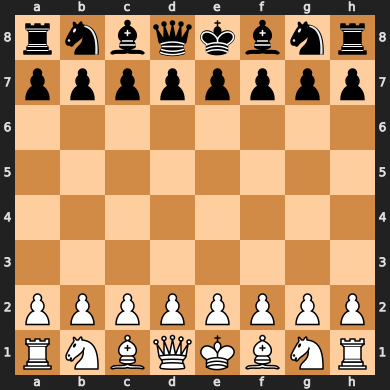

In [12]:
board

In [13]:
board.apply_mirror()
board.fen()

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'

In [14]:
board.apply_transform(chess.flip_horizontal)
board.apply_transform(chess.flip_vertical)

In [15]:
board.apply_transform(chess.flip_horizontal)
board.apply_transform(chess.flip_vertical)

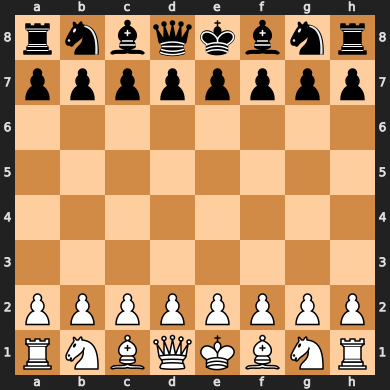

In [16]:
board

rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1


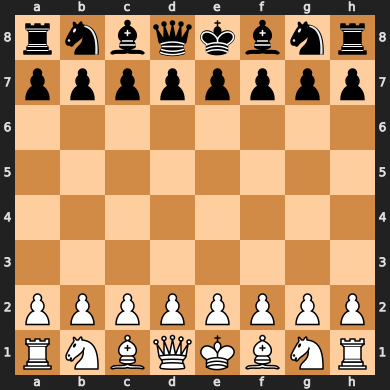

In [17]:
board = chess.Board()
print(board.fen())
board

r1bqkbnr/pppppppp/n7/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 1 2


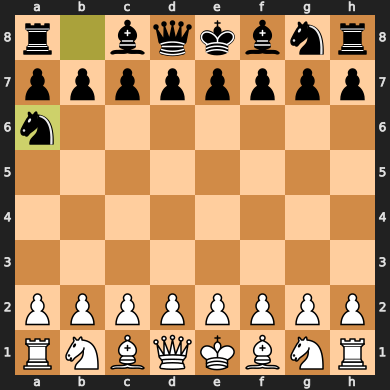

In [18]:
board.apply_mirror()
move = random.choice(list(board.legal_moves))
board.push(move)
print(board.fen())
board

In [19]:
board.castling_xfen()

'KQkq'

In [20]:
board = chess.Board()

In [21]:
pieces = 'KQBNRP'
all_pieces = pieces + pieces.lower()

In [22]:
def replace_empty_squares(fen: str):
    for i in range(1,9):
        fen = fen.replace(str(i), i*"0")
        
    return fen

In [23]:
fb = replace_empty_squares(board.board_fen())

In [24]:
fb

'rnbqkbnr/pppppppp/00000000/00000000/00000000/00000000/PPPPPPPP/RNBQKBNR'

In [25]:
all_pieces

'KQBNRPkqbnrp'

In [26]:
def get_piece_planes(board_fen):
    pieces = "KQBNRPkqbnrp"
    fen = replace_empty_squares(board_fen)
    
    fen = fen.replace("/", "")
    fen = np.array(list(fen)).reshape((8,8))
    planes = np.zeros((12,8,8))
    for i, piece in enumerate(pieces):
        planes[i][np.where(fb == piece)] = 1
        
    return planes

def get_special_planes(castling_rights, to_move, half_moves, full_moves):
    planes = []
    
    # castling rights
    for right in "KQkq":
        planes.append(np.full((8,8), int(right in castling_rights)))
        
    # half moves
    planes.append(np.full((8,8), int(half_moves)))
    
    # full moves
    planes.append(np.full((8,8), int(full_moves)))
    
    # player color
    planes.append(np.full((8,8), int(to_move == 'w')))
    
    planes = np.array(planes)
    
    return planes
        

def board_to_planes(board):
    board_fen, to_move, castling_rights, _, half_moves, full_moves = board.fen().split(" ")
    piece_planes = get_piece_planes(board_fen)
    special_planes = get_special_planes(castling_rights, to_move, half_moves, full_moves)
           
    return np.concatenate([piece_planes, special_planes])

In [27]:
planes = board_to_planes(board)

In [28]:
planes.shape

(19, 8, 8)

In [29]:
planes[-3]

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [30]:
from collections import deque
import numpy as np

In [31]:
d = deque([1,2,3,4], 5)

In [32]:
d.appendleft(1)

In [33]:
d

deque([1, 1, 2, 3, 4])

In [34]:
directions = np.array([[0,1], [1,1], [1,0], [1,-1], [0,-1], [-1,-1], [-1,0], [-1,1]])

def get_move_to_index():
    codes, i = {}, 0
    
    # for direction in ["N", "NE", "E", "SE", "S", "SW", "W", "NW"]:
    for direction in directions:
        for squares in range(1,8):
            codes[tuple(list(squares * direction) + [None])] = i
            i += 1

    for two in [2, -2]:
        for one in [1, -1]:
            codes[(two, one, None)], i = i, i+1

    for two in [2, -2]:
        for one in [1,-1]:
            codes[(one, two, None)], i = i, i+1

    for move in [[0,1],[1,1],[-1,1]]:
        for promote_to in ["q", "r", "n", "b"]:
            codes[tuple(move + [promote_to])] , i = i , i + 1
            
    return codes

index_to_file = dict(enumerate("abcdefgh"))
file_to_index = {v:k for k,v in index_to_file.items()}
assert len(index_to_file) == len(file_to_index)

index_to_rank = dict(enumerate(range(1,9)))
rank_to_index = {v:k for k,v in index_to_rank.items()}
assert len(index_to_rank) == len(rank_to_index)

move_to_index = get_move_to_index()
index_to_move = {v:k for k,v in move_to_index.items()}
assert len(move_to_index) == len(index_to_move)

policy_uci = np.zeros((8,8,len(move_to_index)), object)

for file in range(8):
    for rank in range(8):
        for move_index, move in index_to_move.items():            
            to_file = file + move[0]
            to_rank = rank + move[1]
            
            promotion = move[2] if move[2] else ''
            
            uci_move = \
                index_to_file[file] + str(index_to_rank[rank]) + \
                index_to_file.get(to_file, '_') + str(index_to_rank.get(to_rank, '_')) + \
                promotion
            
            policy_uci[file][rank][move_index] = uci_move

print(policy_uci.shape)
policy_uci = policy_uci.flatten()

uci_to_policy = {v:k for k,v in enumerate(policy_to_uci.flatten()) if '_' not in v} 

(8, 8, 76)


NameError: name 'policy_to_uci' is not defined

In [ ]:
board.turn

In [35]:
board.apply_mirror()

In [36]:
[uci_to_policy[move.uci()] for move in board.legal_moves]

NameError: name 'uci_to_policy' is not defined

In [431]:
np.zeros(len(policy_to_uci))

array([0., 0., 0., ..., 0., 0., 0.])

In [435]:
np.random.beta(1, 1, len(policy_to_uci))

array([0.45522107, 0.5634708 , 0.495342  , ..., 0.31804805, 0.62688898,
       0.97387667])

In [37]:
board.push(chess.Move.from_uci('a1b8'))

In [38]:
board.push(chess.Move.from_uci('g7g6'))

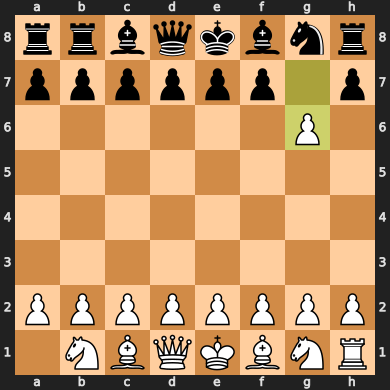

In [39]:
board

In [40]:
board.apply_mirror()

In [41]:
outcome = board.outcome()

In [44]:
board.fen()

'1nbqkbnr/pppppppp/8/8/8/6p1/PPPPPP1P/RRBQKBNR w KQk - 0 2'

In [45]:
board.apply_mirror()

In [46]:
board.fen()

'rrbqkbnr/pppppp1p/6P1/8/8/8/PPPPPPPP/1NBQKBNR b Kkq - 0 2'

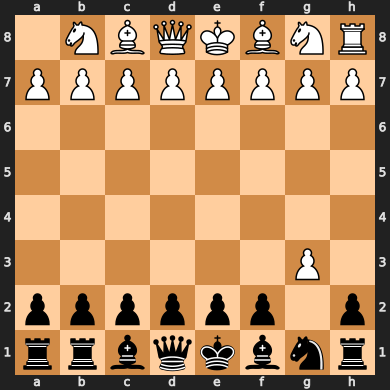

In [54]:
board.transform(chess.flip_horizontal)


In [62]:
board = chess.Board()

In [66]:
b = board.transform(chess.flip_vertical)
b = b.transform(chess.flip_horizontal)

In [67]:
[move.uci() for move in b.legal_moves]

['g8h6', 'g8f6', 'b8c6', 'b8a6']

In [69]:
b.fen()

'RNBKQBNR/PPPPPPPP/8/8/8/8/pppppppp/rnbkqbnr w - - 0 1'

In [72]:
board.fen()

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'

In [99]:
board.apply_mirror()

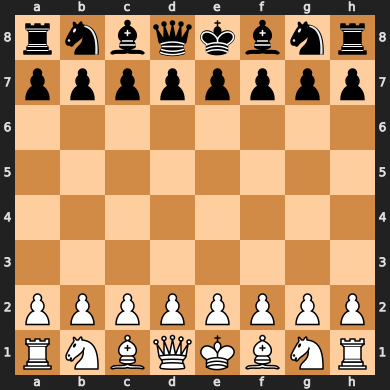

In [100]:
board

In [101]:
[move.uci() for move in board.legal_moves]

['g8h6',
 'g8f6',
 'b8c6',
 'b8a6',
 'h7h6',
 'g7g6',
 'f7f6',
 'e7e6',
 'd7d6',
 'c7c6',
 'b7b6',
 'a7a6',
 'h7h5',
 'g7g5',
 'f7f5',
 'e7e5',
 'd7d5',
 'c7c5',
 'b7b5',
 'a7a5']

In [77]:
b = board.copy(stack=False)

In [79]:
b.apply_mirror()